# Data Visualization with Python · Navigation App

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 03/09/2024

### Context

The analytics team is still in the early stages of their user churn project for Waze, a Navigation App.<br>
A Senior Data Analyst requests an assistance with EDA and further data visualization according to several tasks mentioned below.

### Data

The dataset is called `waze_dataset.csv` and represents the user sessions data during the last month.

### Execution

For EDA of the data, imported the packages that will be most helpful.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loaded and stored the data as a dataframe object called `df`.

In [52]:
df = pd.read_csv('waze_dataset.csv')

Reviewed the head of the dataset and its basic characteristics.

In [53]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [54]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [55]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Task:** Examine the spread and distribution of important variables using box plots and histograms.

**`sessions`**
The number of occurrence of a user opening the app during the month.

Text(0.5, 1.0, 'Sessions')

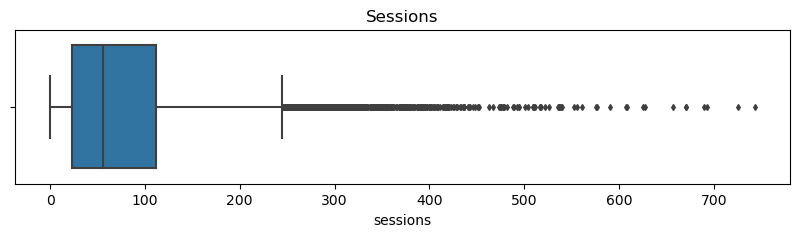

In [69]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['sessions'], fliersize = 3)
plt.title('Sessions')

Text(0.5, 1.0, 'Sessions')

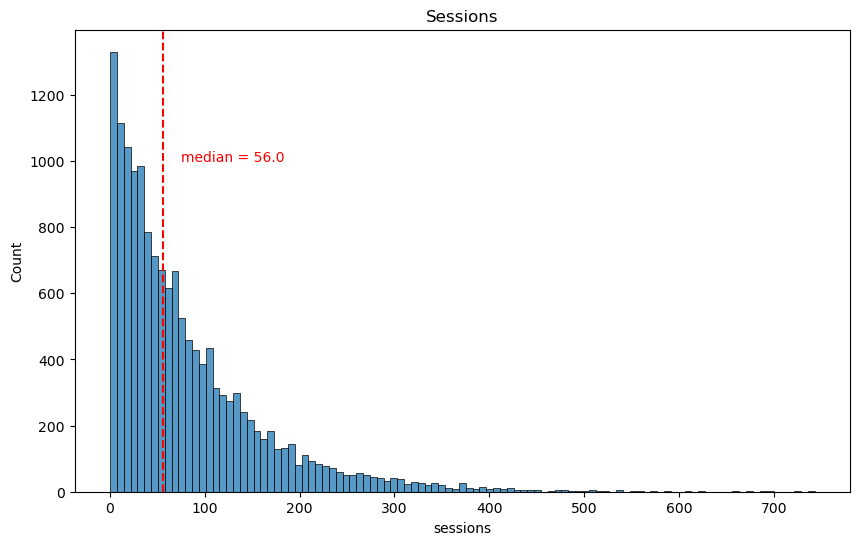

In [71]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'sessions')
plt.axvline(df['sessions'].median(), color = 'red', linestyle = '--')
plt.text(75, 1000, f"median = {df['sessions'].median()}", color = 'red')
plt.title('Sessions')

**Observation:** The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the graphs, there are some users who have more than 700.

**`drives`** An occurrence of driving at least 1 km during the month.

Text(0.5, 1.0, 'Drives')

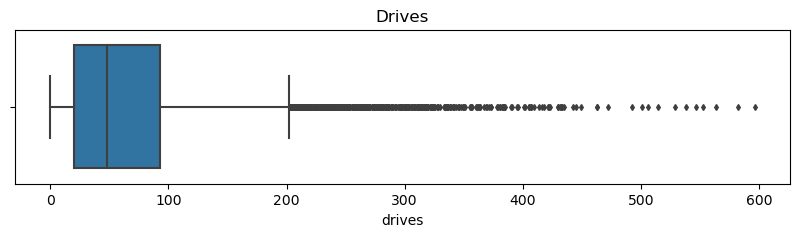

In [72]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['drives'], fliersize = 3)
plt.title('Drives')

Defined a function that helps to plot histograms with a particular style / format using this particular dataset.

In [81]:
def histogrammer(column, median_text = True, **kwargs):
    median = round(df[column].median(), 1)
    plt.figure(figsize = (10,6))
    ax = sns.histplot(x = df[column], **kwargs)
    plt.axvline(median, color = 'red', linestyle = '--')
    if median_text == True:
        ax.text(0.25, 0.85, f"median = {median}", color = 'red',
            ha = 'left', va = 'top', transform = ax.transAxes)
    else:
        print("median:", median)
    plt.title(f"{column} histogram")

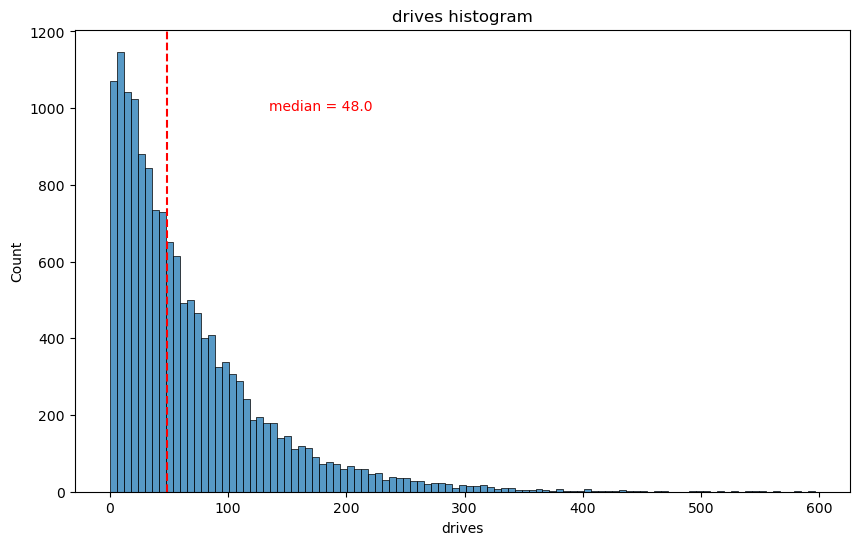

In [82]:
histogrammer('drives')

**Observation:** The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. And again, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

Text(0.5, 1.0, 'Total Sessions')

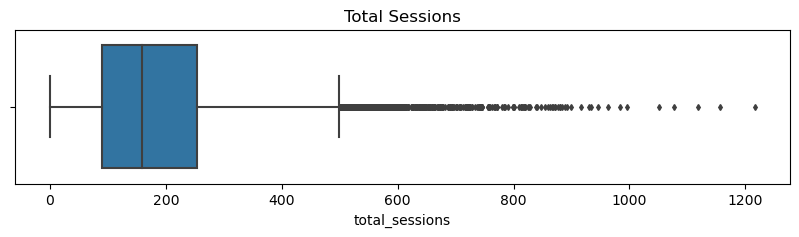

In [104]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['total_sessions'], fliersize = 3)
plt.title('Total Sessions')

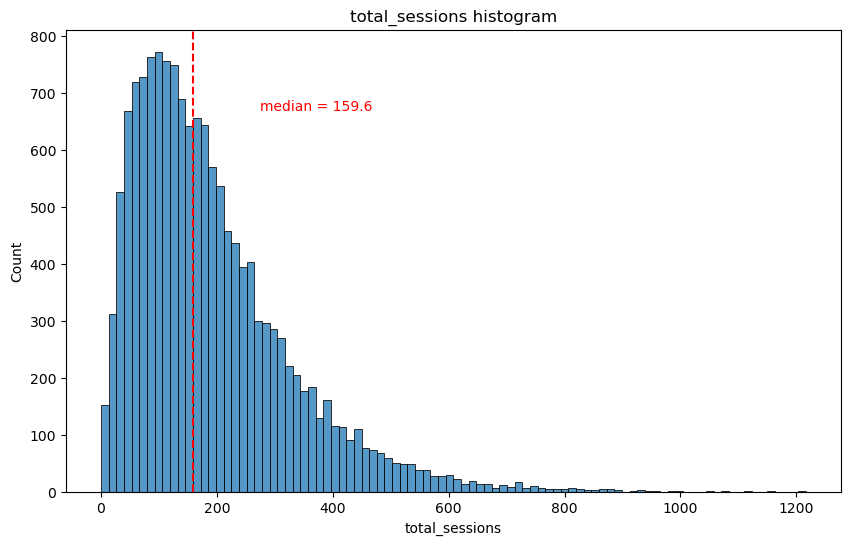

In [84]:
histogrammer('total_sessions')

**Observation:** The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something that can be examined more closely later.

**`n_days_after_onboarding`** The number of days since a user signed up for the app.

Text(0.5, 1.0, 'Number of days after onboarding')

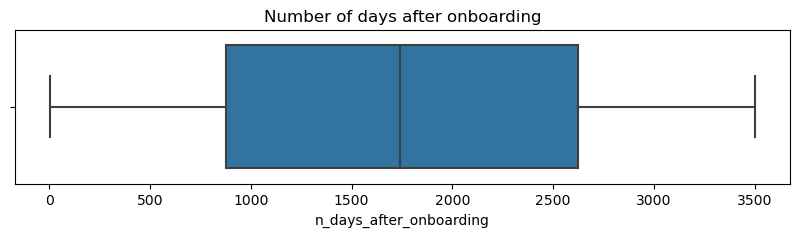

In [85]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['n_days_after_onboarding'], fliersize = 3)
plt.title('Number of days after onboarding')

median: 1741.0


Text(1830, 650, 'median = 1741.0')

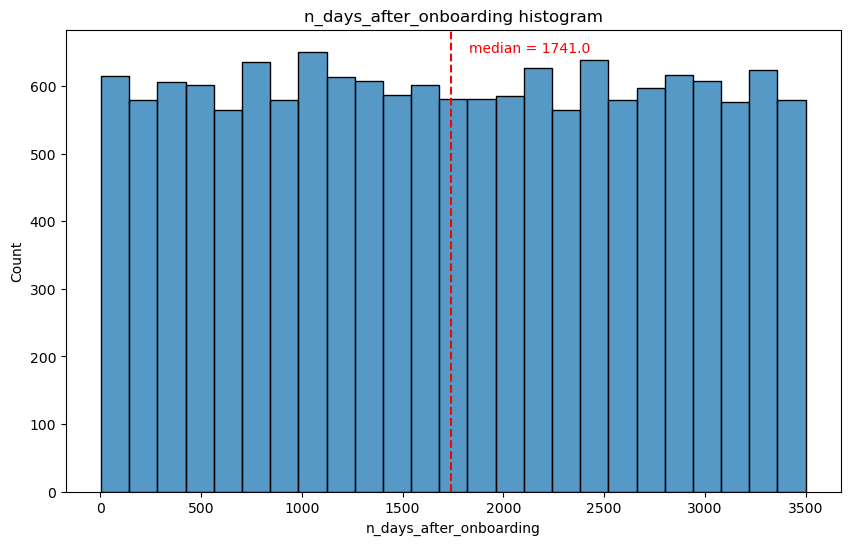

In [88]:
histogrammer('n_days_after_onboarding', median_text = False)
plt.text(1830, 650, f"median = {df['n_days_after_onboarding'].median()}", color = 'red')

**Observation:** The total user tenure (number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

**`driven_km_drives`** Total kilometers driven during the month.

Text(0.5, 1.0, 'Driven km drives')

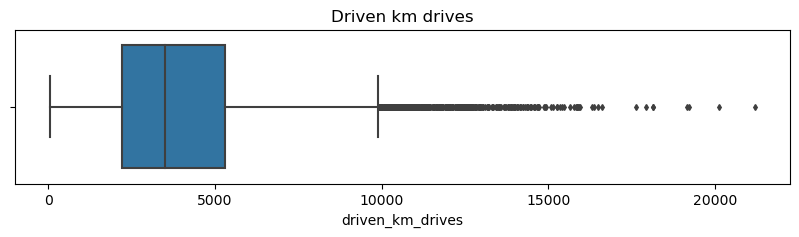

In [89]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['driven_km_drives'], fliersize = 3)
plt.title('Driven km drives')

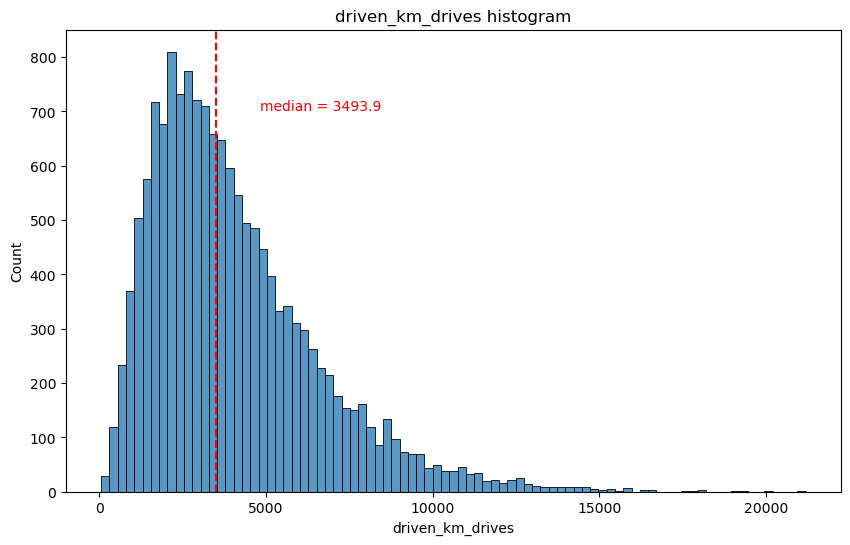

In [91]:
histogrammer('driven_km_drives')

**Observation:** The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. Moreover, the longest distance driven in the month was over half the circumferene of the Earth.

**`duration_minutes_drives`** Total duration driven in minutes during the month.

Text(0.5, 1.0, 'duration_minutes_drives')

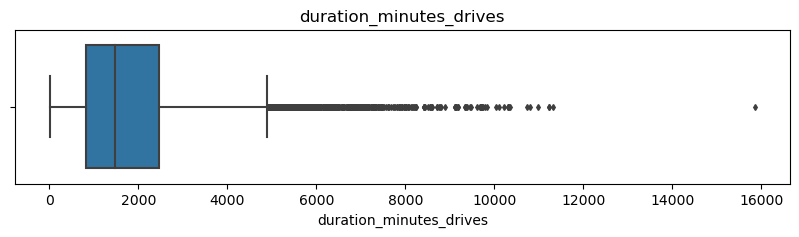

In [94]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['duration_minutes_drives'], fliersize = 3)
plt.title('duration_minutes_drives')

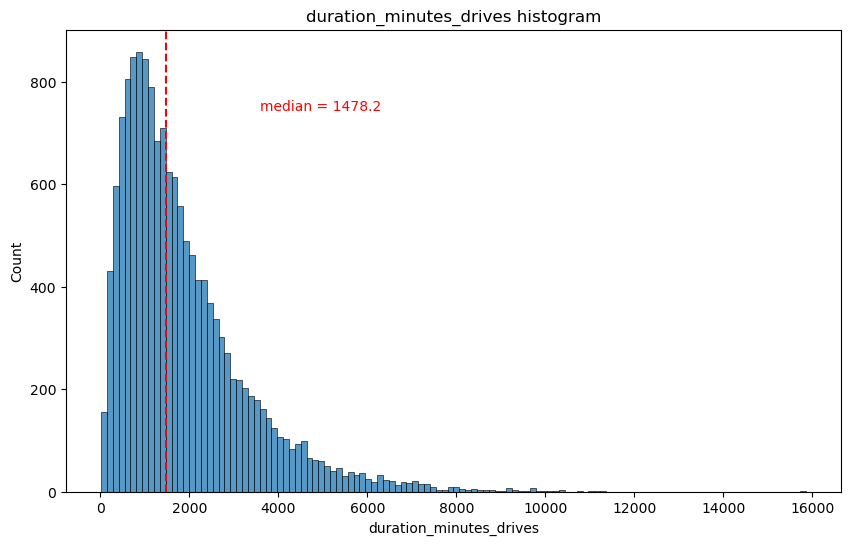

In [98]:
histogrammer('duration_minutes_drives')

**Observation:** The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

**`activity_days`** Number of days the user opens the app during the month.

Text(0.5, 1.0, 'activity_days')

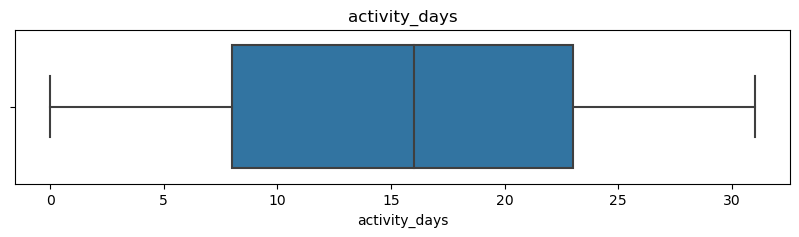

In [96]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['activity_days'], fliersize = 3)
plt.title('activity_days')

median: 16.0


Text(10.5, 970, 'median = 16.0')

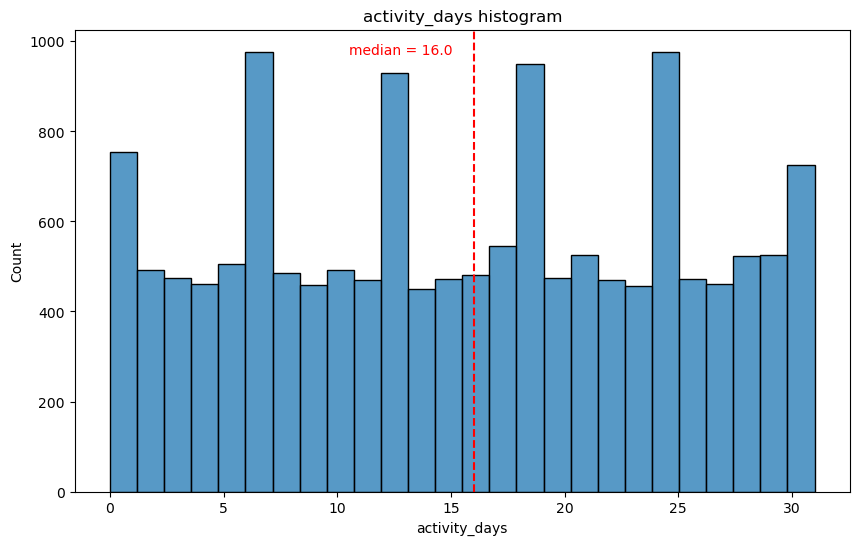

In [135]:
histogrammer('activity_days', median_text = False)
plt.text(10.5, 970, f"median = {df['activity_days'].median()}", color = 'red')

**Observation:** Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. This distribution is noteworthy because it does not mirror the `sessions` distribution at all.

**`driving_days`** Number of days the user drives (at least 1 km) during the month.

Text(0.5, 1.0, 'driving_days')

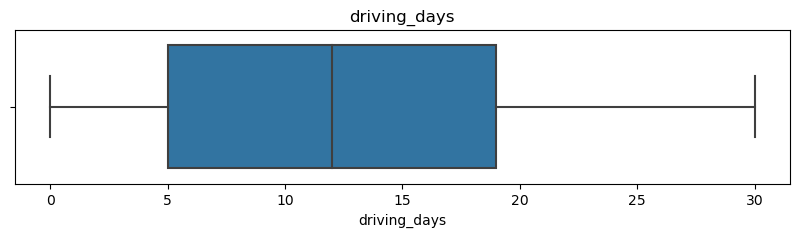

In [105]:
plt.figure(figsize = (10,2))
sns.boxplot(x = df['driving_days'], fliersize = 3)
plt.title('driving_days')

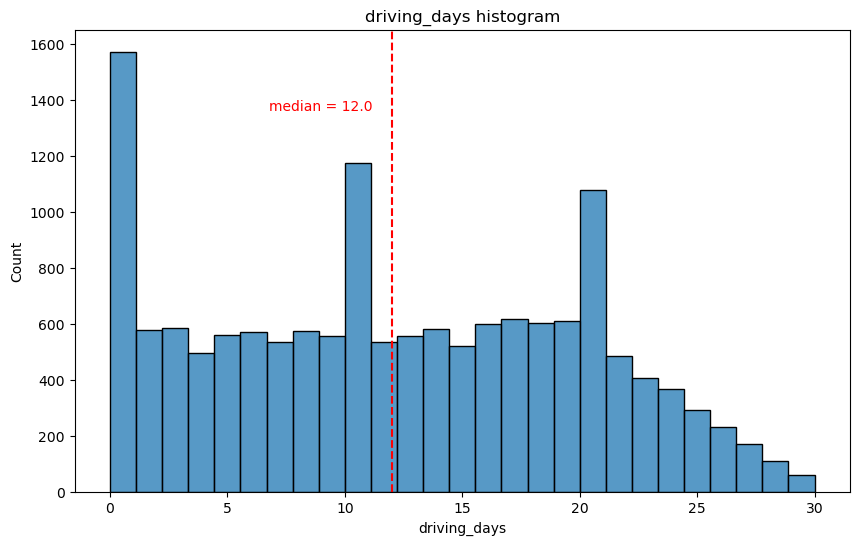

In [106]:
histogrammer('driving_days')

**Observation:** The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there are almost twice as many users (\~1550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, and there were \~750 users who did not open the app at all during the month and ~750 users who opened the app every day.

This disparity can be flagged for further investigation.

**Task:** Examine the distribution of important categorical variables using appropriate graph types.

**`device`** Type of device a user starts a session with.

Text(0.5, 1.0, 'Users by device')

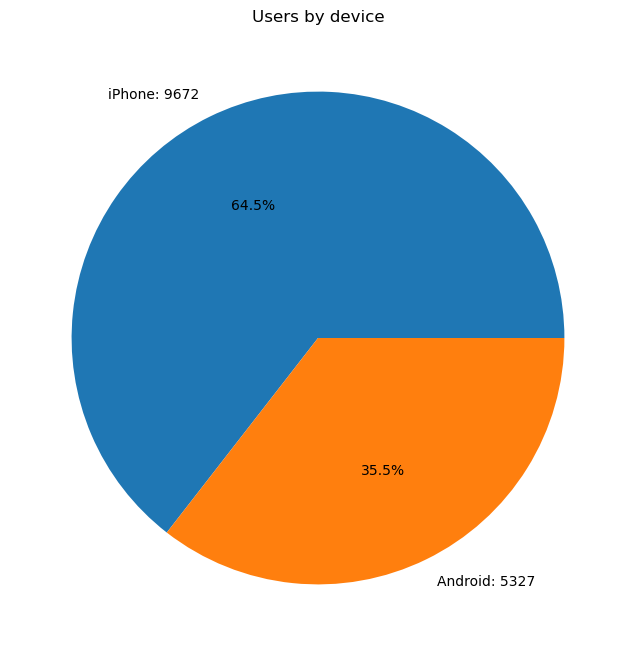

In [107]:
devices = df['device'].value_counts()

plt.figure(figsize = (10,8))
plt.pie(devices, labels = [f'{devices.index[0]}: {devices[0]}', f'{devices.index[1]}: {devices[1]}'], 
        autopct='%1.1f%%')
plt.title('Users by device')

**Observation:** There are nearly twice as many iPhone users as Android users represented in this data.

**`label`** “Retained” vs “Churned” for if a user has churned anytime during the course of the month.

Text(0.5, 1.0, 'Retained vs Churned')

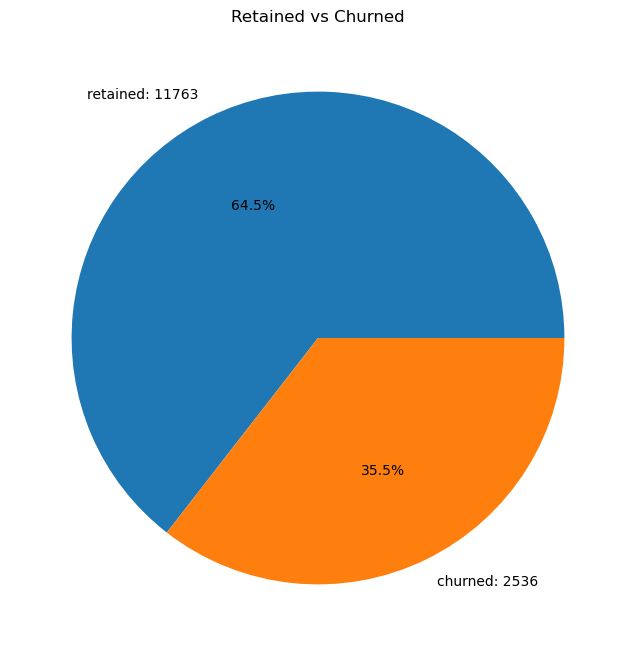

In [108]:
labels = df['label'].value_counts()

plt.figure(figsize = (10,8))
plt.pie(devices, labels = [f'{labels.index[0]}: {labels[0]}', f'{labels.index[1]}: {labels[1]}'], 
        autopct='%1.1f%%')
plt.title('Retained vs Churned')

**Observation:** Less than 18% of the users churned.

**Task:** Show retention by device type combining `device` and `label` variables.

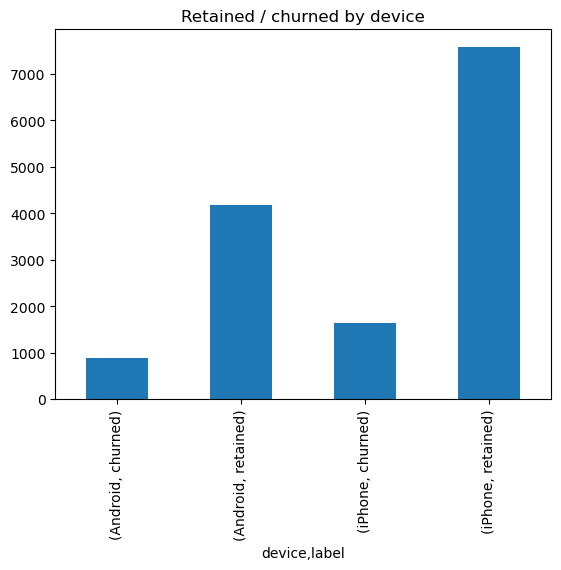

In [111]:
hist = df.groupby(['device','label']).size()
hist.plot(kind = 'bar')
plt.title('Retained / churned by device')
plt.show()

**Observation:** The proportion of churned users to retained users is more or less consistent between device types.

**Task:** Show retention by kilometers driven per driving day, combining `driven_km_drives` and `driving_days` variables.

Created a new column called `km_per_driving_day`, which represents the mean distance driven per driving day for each user. Showed the description of the new column.

In [120]:
df['km_per_driving_day'] = df.eval('`driven_km_drives` / `driving_days`')
df['km_per_driving_day'].replace(np.inf, 0, inplace = True)

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

**Observation:** The maximum value is 15,420 kilometers per drive day, which is physically impossible. Driving 100 km / hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, the rows where the distance in this column is greater than 1,200 km should be disregarded when plotting.

Text(0.5, 1.0, 'Churn rate by mean km per driving day')

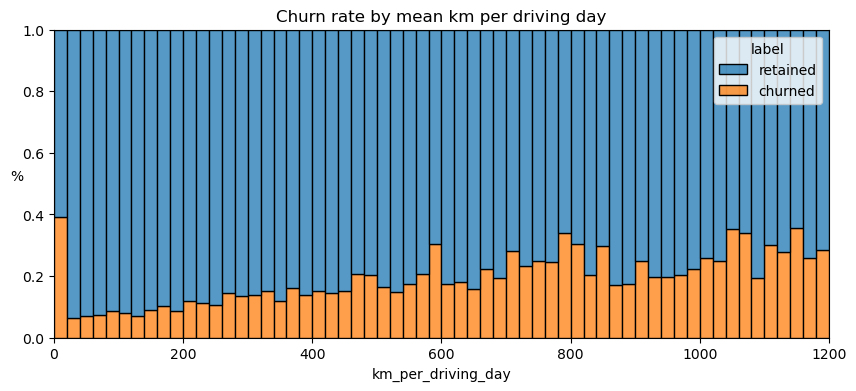

In [122]:
plt.figure(figsize = (10,4))
sns.histplot(data = df,
             x = 'km_per_driving_day',
             bins = range(0,1201,20),
             hue = 'label',
             multiple = 'fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km per driving day')

**Observation:** The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

**Task:** Illustrate churn rate per number of `driving days`.

Text(0.5, 1.0, 'Churn rate per driving day')

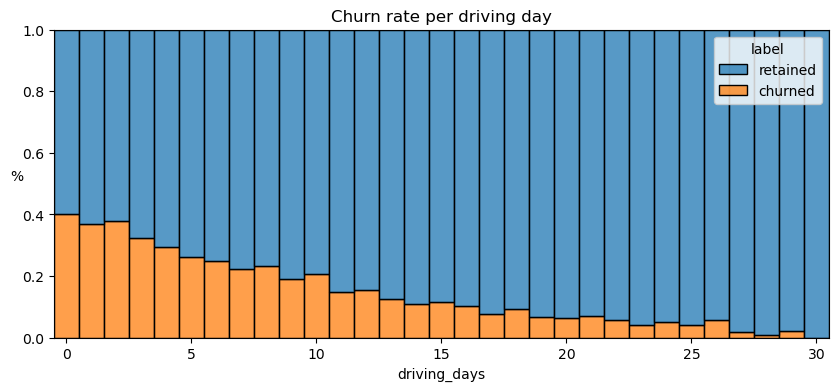

In [123]:
plt.figure(figsize = (10,4))
sns.histplot(data = df,
             x = 'driving_days',
             bins = range(1,32),
             hue = 'label',
             multiple = 'fill',
             discrete = True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate per driving day')

**Observation:** The churn rate is highest for people who didn't use the app much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

**Task:** Show the proportion of sessions that occurred in the last month.

Created a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [124]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Created a histogram depicting the distribution of values in this new column.

median: 0.4


Text(0.5, 600, 'median = 0.42')

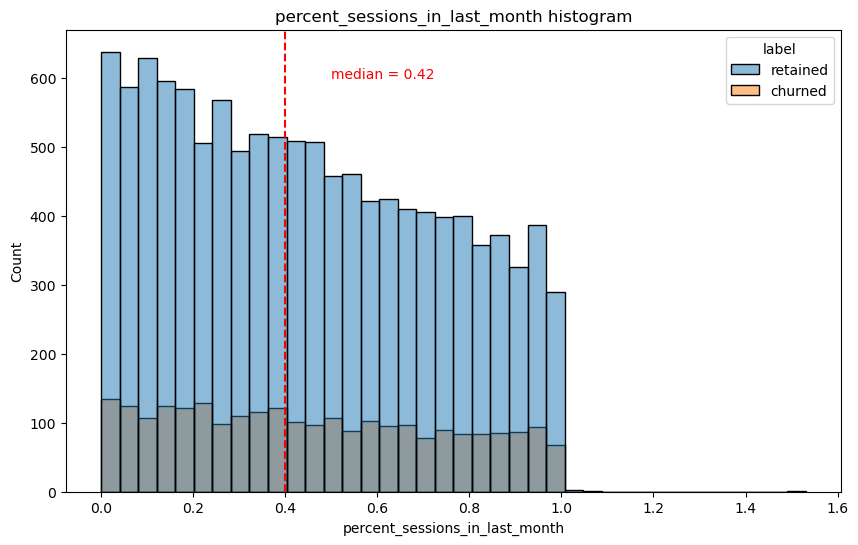

In [131]:
histogrammer('percent_sessions_in_last_month',
             hue = df['label'],
             multiple = 'layer',
             median_text = False)
plt.text(0.5, 600, f"median = {round(df['percent_sessions_in_last_month'].median(),2)}", color = 'red')

Checked the median value of the `n_days_after_onboarding` variable.

In [132]:
df['n_days_after_onboarding'].median()

1741.0

**Observation:** Half of the people in the dataset had around 42% of their sessions in just the last month, yet the overall median time since onboarding is almost 5 years.

Plotted a histogram of `n_days_after_onboarding` for just the people who had 42% or more of their total sessions in the last month.

Text(0.5, 1.0, 'Number of days after onboarding for users with >= 42% sessions in last month')

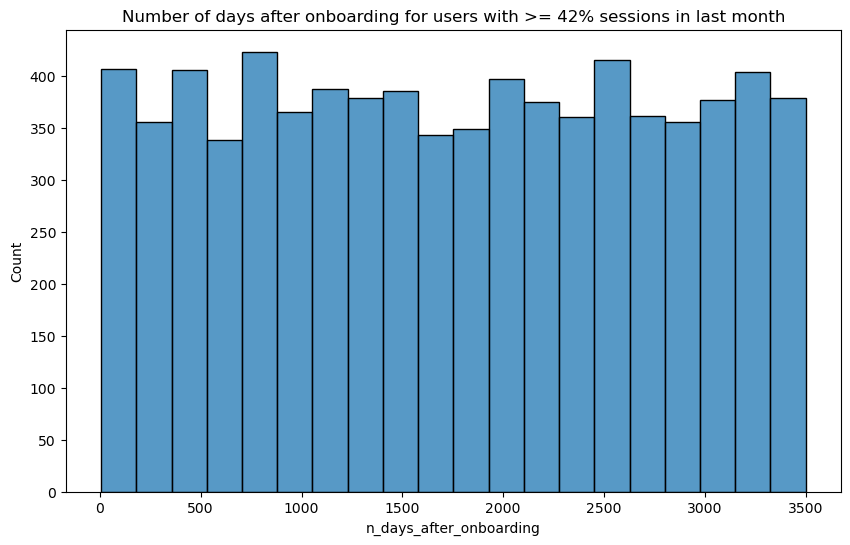

In [134]:
data = df.loc[df['percent_sessions_in_last_month'] >= 0.42]
plt.figure(figsize = (10,6))
sns.histplot(x = data['n_days_after_onboarding'])
plt.title('Number of days after onboarding for users with >= 42% sessions in last month')

**Observation:** The number of days since onboarding for users with 42% or more of their total sessions occurring in just the last month is a uniform distribution. It means that not only new users, but also many long-time users suddenly started using the app intensively in the last month, which should be the subject to discuss with the App team.

**Task:** Replace outliers with the 95% percentile value in the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

Wrote a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile of the given distribution.

In [137]:
def deoutlier(var):
    var_95_percentile = var.quantile(0.95)
    var.where(var < var_95_percentile, var_95_percentile, inplace = True)

Applied the function to the mentioned columns.

In [138]:
for column in [df.sessions, df.drives, df.total_sessions, df.driven_km_drives, df.duration_minutes_drives]:
    deoutlier(column)

Showed description to see if your change worked.

In [139]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.